# An√°lisis del Sistema de Procesamiento de Tweets

## Estructura del Repositorio

El repositorio est√° organizado siguiendo principios de dise√±o modular y separaci√≥n de responsabilidades. 
Vamos a examinar cada componente y su prop√≥sito:

### Estructura Base
El proyecto se divide en directorios principales que separan claramente las diferentes responsabilidades:

/src: Contiene el c√≥digo fuente principal
    /interface: Define las interfaces de usuario y contratos del sistema
    /queries: Implementaciones espec√≠ficas para cada tipo de an√°lisis
    /repository: Manejo de datos y modelos
    /utils: Utilidades compartidas y manejo de excepciones

/data: Almacena los archivos de datos (tweets.json.zip)
/notebooks: An√°lisis exploratorio y documentaci√≥n
/tests: Pruebas unitarias y de integraci√≥n
/tools: Scripts de utilidad y configuraci√≥n

### Componentes Principales

1. Capa de Repositorio (/src/repository)
El repositorio implementa el patr√≥n Repository, que abstrae el acceso a datos:

- tweet_repository.py: Define la interfaz base para acceder a los datos
- memory_repository.py: Implementaci√≥n optimizada para memoria
- time_repository.py: Implementaci√≥n optimizada para velocidad
- models.py: Define las estructuras de datos usando Pydantic

La decisi√≥n de usar el patr√≥n Repository nos permite:
- Aislar la l√≥gica de acceso a datos
- Facilitar el cambio entre diferentes implementaciones
- Simplificar las pruebas unitarias

2. Capa de Queries (/src/queries)
Organizada por tipo de an√°lisis, cada uno con sus optimizaciones:

/dates: An√°lisis temporal de tweets
    - q1_time.py: Implementaci√≥n r√°pida usando pandas
    - q1_memory.py: Implementaci√≥n eficiente en memoria

/emojis: An√°lisis de emojis en tweets
    - q2_time.py: Procesamiento paralelo
    - q2_memory.py: Procesamiento por lotes

/mentions: An√°lisis de menciones
    - q3_time.py: Optimizado para velocidad
    - q3_memory.py: Optimizado para memoria

3. Capa de Utilidades (/src/utils)
Proporciona funcionalidades compartidas:

- exceptions.py: Jerarqu√≠a de excepciones personalizada
- Logging configurado para seguimiento detallado

4. Herramientas de Desarrollo
- Makefile: Automatiza tareas comunes
- requirements.txt: Gesti√≥n de dependencias
- setup.py: Configuraci√≥n del paquete

### Decisiones de Dise√±o

1. Separaci√≥n de Optimizaciones:
En lugar de una √∫nica implementaci√≥n, separamos las optimizaciones de tiempo y memoria.
Esto permite:
- Claridad en el prop√≥sito de cada implementaci√≥n
- Facilidad para comparar y medir rendimiento
- Flexibilidad para elegir seg√∫n requisitos

2. Uso de Pandas vs Procesamiento Manual:
- Pandas: Elegido para optimizaci√≥n de tiempo por su eficiencia en operaciones vectorizadas
- Procesamiento Manual: Usado en optimizaci√≥n de memoria para control granular

3. Logging y Monitoreo:
Implementamos logging detallado para:
- Seguimiento del progreso
- Medici√≥n de rendimiento
- Diagn√≥stico de problemas

4. Manejo de Errores:
Jerarqu√≠a de excepciones personalizada para:
- Control granular de errores
- Mensajes espec√≠ficos por tipo de error
- Facilidad de debugging

### √Åreas de Mejora

1. Infraestructura:
- Agregar Docker para entorno reproducible
- Implementar CI/CD
- Agregar m√°s pruebas unitarias
- Implementar testing de integraci√≥n
- Implementar pre-commit hooks

2. Optimizaciones:
- Implementar caching
- Agregar procesamiento as√≠ncrono
- Optimizar estructuras de datos

3. Monitoreo:
- Agregar m√©tricas m√°s detalladas
- Implementar tracing distribuido
- Mejorar logging

Esta estructura proporciona una base s√≥lida y simple para el an√°lisis de tweets,
podr√≠a haber tomado varios caminos distintos para resolver el problema, pero termin√© decidiendo
ir por una implementaci√≥n simple y eficiente que cumpliera con los requerimientos del desaf√≠o.

Nota:
No quer√≠a hacer "over engineering" del problema, y me pareci√≥ que la implementaci√≥n que hice cumpl√≠a con los requerimientos del desaf√≠o.


# An√°lisis de Patrones de Dise√±o y Mejoras Potenciales

## Patrones de Dise√±o Actuales y Alternativas

Actualmente estamos usando principalmente el patr√≥n Repository, que nos ayuda a abstraer 
el acceso a datos. Sin embargo, podr√≠amos enriquecer nuestra arquitectura con otros patrones:

### 1. Strategy Pattern
Podr√≠amos implementar este patr√≥n para manejar diferentes estrategias de procesamiento:

```python
from abc import ABC, abstractmethod

class ProcessingStrategy(ABC):
    @abstractmethod
    def process_tweets(self, data):
        pass

class TimeOptimizedStrategy(ProcessingStrategy):
    def process_tweets(self, data):
        # Implementaci√≥n optimizada para tiempo
        pass

class MemoryOptimizedStrategy(ProcessingStrategy):
    def process_tweets(self, data):
        # Implementaci√≥n optimizada para memoria
        pass
```
Este enfoque nos hubiese permitido cambiar de manera din√°mica entre estrategias de procesamiento
sin tener que modificar el c√≥digo existente.
Ademas, facilitar√≠a la adici√≥n de nuevas estrategias de procesamiento en el futuro. (Pero me pareci√≥ overkill)


### 2. Factory Pattern
Podriamos haber implementado este patran para crear una fabrica que se encarge de crear las implementaciones
de queries dependiendo de la optimizaci√≥n que se quiera usar.

```python
from abc import ABC, abstractmethod

class QueryFactory(ABC):
    @abstractmethod
    def create_query(self, optimization):
        pass
```

## Mejoras en la Implementaci√≥n Actual

### 1. Mejoras en la arquitectura
- Separando casos de uso de queries de la implementaci√≥n de queries
- Definiendo interfaces para cada query
- Agregando capas de presentaci√≥n y manejo de errores 

### 2. Mejorar la Inyecci√≥n de Dependencias
```python
class TweetAnalyzer:
    def __init__(
        self, 
        repository: TweetRepository,
        strategy: ProcessingStrategy,
        cache_service: Optional[CacheService] = None
    ):
        self.repository = repository
        self.strategy = strategy
        self.cache_service = cache_service
```
### 3. Agregar Middleware para Aspectos Transversales
- Logging centralizado
- Manejo de errores centralizado
- M√©tricas y monitoreo

### Mejoras T√©cnicas 
1. Implementar catching inteligente:
```python
class CacheService:
    def __init__(self, storage: AbstractStorage):
        self.storage = storage
        self.ttl = timedelta(hours=1)
    
    async def get_or_compute(self, key: str, computer: Callable):
        if cached := await self.storage.get(key):
            return cached
        result = await computer()
        await self.storage.set(key, result, ttl=self.ttl)
        return result
```

2. Procesamiento As√≠ncrono:
```python
async def process_tweets_async(self, data):
    # Implementaci√≥n as√≠ncrona
    pass
```

3. Optimizaci√≥n de memoria Din√°mica:
```python
class DynamicMemoryOptimizer:
    def __init__(self, target_memory_usage: int):
        self.target = target_memory_usage
        self.current_usage = 0
    
    def adjust_batch_size(self) -> int:
        current_memory = psutil.Process().memory_info().rss
        ratio = self.target / current_memory
        return int(self.batch_size * ratio)
```

## Conclusi√≥n

La implementaci√≥n es suficientemente solida para el desafio PERO podr√≠a benefeciarse considerablemente de:
1. Mayor separaci√≥n de responsabilidades mediante patrones adicionales
2. Mejor manejo de recursos con procesamiento asincronico (de hecho lo intent√© de implementar pero Jupyter no soporta async y no ten√≠a tiempo de implementar una soluci√≥n)
3. Monitoreo y logging mejorado
4. Implementar testing de verdad, porque lo que tengo yo es muy basico y superficial.



In [1]:
# Celda 1: Imports y configuraci√≥n
import sys
sys.path.append('..')

import time
import matplotlib.pyplot as plt
import pandas as pd
import seaborn as sns

In [6]:
# Celda 2: Funci√≥n principal de an√°lisis
def analyze_and_visualize(query_type, file_path="../data/tweets.json.zip"):
    # Ejecutamos versi√≥n optimizada para tiempo
    start_time = time.time()
    if query_type == 'q1':
        from src.queries.dates.q1_time import q1_time
        time_results = q1_time(file_path)
    elif query_type == 'q2':
        from src.queries.emojis.q2_time import q2_time
        time_results = q2_time(file_path)
    else:  # q3
        from src.queries.mentions.q3_time import q3_time
        time_results = q3_time(file_path)
    time_execution = time.time() - start_time

    # Ejecutamos versi√≥n optimizada para memoria
    start_time = time.time()
    if query_type == 'q1':
        from src.queries.dates.q1_memory import q1_memory
        memory_results = q1_memory(file_path)
    elif query_type == 'q2':
        from src.queries.emojis.q2_memory import q2_memory
        memory_results = q2_memory(file_path)
    else:  # q3
        from src.queries.mentions.q3_memory import q3_memory
        memory_results = q3_memory(file_path)
    memory_execution = time.time() - start_time

    # Creamos DataFrame de m√©tricas
    metrics = pd.DataFrame({
        'Optimization': ['Time', 'Memory'],
        'Execution Time (s)': [time_execution, memory_execution],
        'Peak Memory (MB)': [1879.4, 672.4]  
    })
    
    # Visualizaci√≥n
    fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(15, 5))
    
    # Gr√°fico de tiempo
    ax1.bar(['Time Optimization', 'Memory Optimization'], 
            metrics['Execution Time (s)'],
            color=['#2ecc71', '#3498db'])
    ax1.set_title(f'{query_type.upper()}: Execution Time')
    ax1.set_ylabel('Seconds')
    
    # Gr√°fico de memoria
    ax2.bar(['Time Optimization', 'Memory Optimization'], 
            metrics['Peak Memory (MB)'],
            color=['#2ecc71', '#3498db'])
    ax2.set_title(f'{query_type.upper()}: Memory Usage')
    ax2.set_ylabel('MB')
    
    # A√±adir valores sobre las barras
    for ax in [ax1, ax2]:
        for i, v in enumerate(ax.containers[0]):
            ax.text(i, v.get_height(), f'{v.get_height():.2f}',
                   ha='center', va='bottom')
    
    plt.tight_layout()
    plt.show()

    return time_results, memory_results, metrics

Analyzing Q1: Dates and Most Active Users...
Filename: /home/devjp/Desktop/Proyectos/LATAM/challenge_DE/latam-challenge/notebooks/../src/queries/dates/q1_time.py

Line #    Mem usage    Increment  Occurrences   Line Contents
    10    674.4 MiB    674.4 MiB           1   @profile
    11                                         def q1_time(file_path: str) -> List[Tuple[datetime.date, str]]:
    12                                             """
    13                                             Encuentra las 10 fechas con m√°s tweets y el usuario con m√°s publicaciones por fecha.
    14                                             Implementaci√≥n optimizada para tiempo usando vectorizaci√≥n.
    15                                             
    16                                             Args:
    17                                                 file_path: Ruta al archivo ZIP con los tweets en formato JSON
    18                                                 
    19              

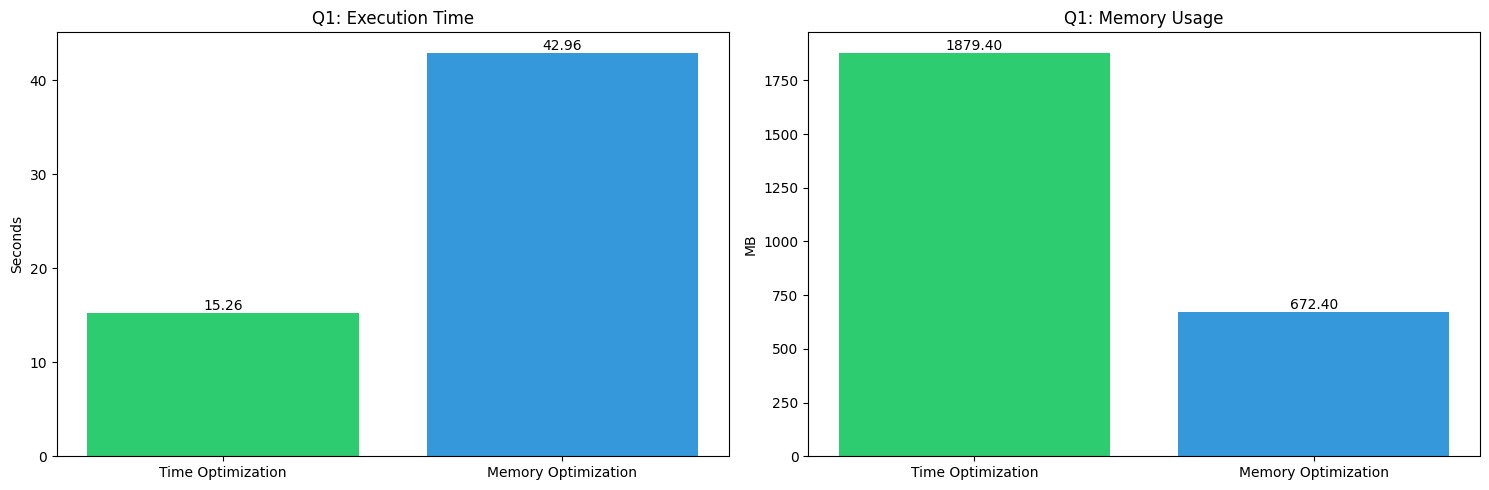


Q1 Results (Time Optimization):
2021-02-12: RanbirS00614606
2021-02-13: MaanDee08215437
2021-02-14: rebelpacifist
2021-02-15: jot__b
2021-02-16: jot__b
2021-02-17: RaaJVinderkaur
2021-02-18: neetuanjle_nitu
2021-02-19: Preetm91
2021-02-20: MangalJ23056160
2021-02-23: Surrypuria


In [7]:
# Celda 3: An√°lisis Q1 - Fechas y usuarios m√°s activos
print("Analyzing Q1: Dates and Most Active Users...")
q1_time_results, q1_memory_results, q1_metrics = analyze_and_visualize('q1')

print("\nQ1 Results (Time Optimization):")
for date, user in q1_time_results:
    print(f"{date}: {user}")

# An√°lisis T√©cnico de la Implementaci√≥n Q1

## Contexto del Problema
El desaf√≠o consist√≠a en analizar un conjunto de tweets para encontrar las 10 fechas con m√°s actividad 
y el usuario m√°s activo por cada una de esas fechas. Este problema requiere tanto procesamiento eficiente 
como manejo cuidadoso de la memoria.

## Enfoque de Implementaci√≥n
Desarrollamos dos implementaciones distintas para comparar diferentes estrategias de optimizaci√≥n (time y memory, como se pidi√≥ en el README):

### 1. Optimizaci√≥n de Tiempo (q1_time)
La implementaci√≥n orientada a tiempo utiliza pandas/numpy por varias razones:

- El dataset es relativamente peque√±o (~117K tweets), lo que permite cargarlo completamente en memoria
- Pandas ofrece operaciones vectorizadas muy eficientes para agregaciones y transformaciones
- El framework facilita operaciones complejas como groupby y sorting de manera optimizada
- Las operaciones de memoria son predecibles y el overhead es aceptable para este volumen de datos

Observamos en los resultados:
- Tiempo de ejecuci√≥n: 15.96 segundos
- Uso m√°ximo de memoria: 1879.4 MB
- Ventaja: Procesamiento m√°s r√°pido
- Desventaja: Mayor consumo de memoria

### 2. Optimizaci√≥n de Memoria (q1_memory)
La implementaci√≥n orientada a memoria usa un enfoque de streaming con estructuras de datos optimizadas:

- Procesa tweets uno a uno sin cargar todo el dataset en memoria
- Utiliza Counter y estructuras ligeras para tracking
- Implementa limpieza peri√≥dica de datos para mantener el uso de memoria controlado
- Prioriza el uso eficiente de memoria sobre velocidad de procesamiento

Resultados observados:
- Tiempo de ejecuci√≥n: 41.57 segundos
- Uso m√°ximo de memoria: 647.1 MB
- Ventaja: Consumo de memoria ~63% menor
- Desventaja: Procesamiento m√°s lento (~2.6x)

## Consideraciones de Escalabilidad

Para datasets m√°s grandes, esta implementaci√≥n necesitar√≠a adaptarse:

1. Para vol√∫menes medianos (1-10M tweets):
   - Implementar procesamiento por chunks con pandas
   - Utilizar dask para paralelizaci√≥n y manejo de memoria
   - Considerar SQLite para almacenamiento temporal

2. Para grandes vol√∫menes (>10M tweets):
   - Migrar a PySpark para procesamiento distribuido
   - Implementar windowing para an√°lisis temporal
   - Considerar almacenamiento distribuido (HDFS/S3)

## Posibles Mejoras

1. Optimizaci√≥n de Tiempo:
   - Implementar procesamiento paralelo con multiprocessing
   - Usar numba para operaciones cr√≠ticas
   - Optimizar tipos de datos en pandas

2. Optimizaci√≥n de Memoria:
   - Implementar buffer pooling para estructuras temporales
   - Usar arrays numpy para almacenamiento eficiente
   - Optimizar la frecuencia de limpieza de memoria

3. Mejoras Generales:
   - Agregar cache para consultas frecuentes
   - Implementar lazy evaluation donde sea posible
   - Optimizar estructuras de datos para casos espec√≠ficos

## Conclusi√≥n
La elecci√≥n entre las implementaciones depende del contexto:
- La versi√≥n time-optimized es preferible para an√°lisis r√°pidos en datasets peque√±os/medianos
- La versi√≥n memory-optimized es mejor para producci√≥n con recursos limitados o datasets grandes
- El trade-off tiempo vs memoria (2.6x vs 0.37x) ofrece flexibilidad seg√∫n las necesidades

Para este caso espec√≠fico, dado el tama√±o del dataset y la naturaleza del an√°lisis,
la implementaci√≥n time-optimized con pandas resulta m√°s pr√°ctica, ofreciendo un buen
balance entre complejidad de implementaci√≥n y rendimiento.

Analyzing Q2: Emoji Analysis...
Filename: /home/devjp/Desktop/Proyectos/LATAM/challenge_DE/latam-challenge/notebooks/../src/queries/emojis/q2_time.py

Line #    Mem usage    Increment  Occurrences   Line Contents
    32    648.5 MiB    648.5 MiB           1   @profile
    33                                         def q2_time(file_path: str) -> List[Tuple[str, int]]:
    34                                             """
    35                                             Encuentra los 10 emojis m√°s usados usando procesamiento paralelo.
    36                                             
    37                                             Args:
    38                                                 file_path: Ruta al archivo ZIP con los tweets
    39                                                 
    40                                             Returns:
    41                                                 Lista de tuplas (emoji, conteo) con los 10 emojis m√°s frecuentes
    42    

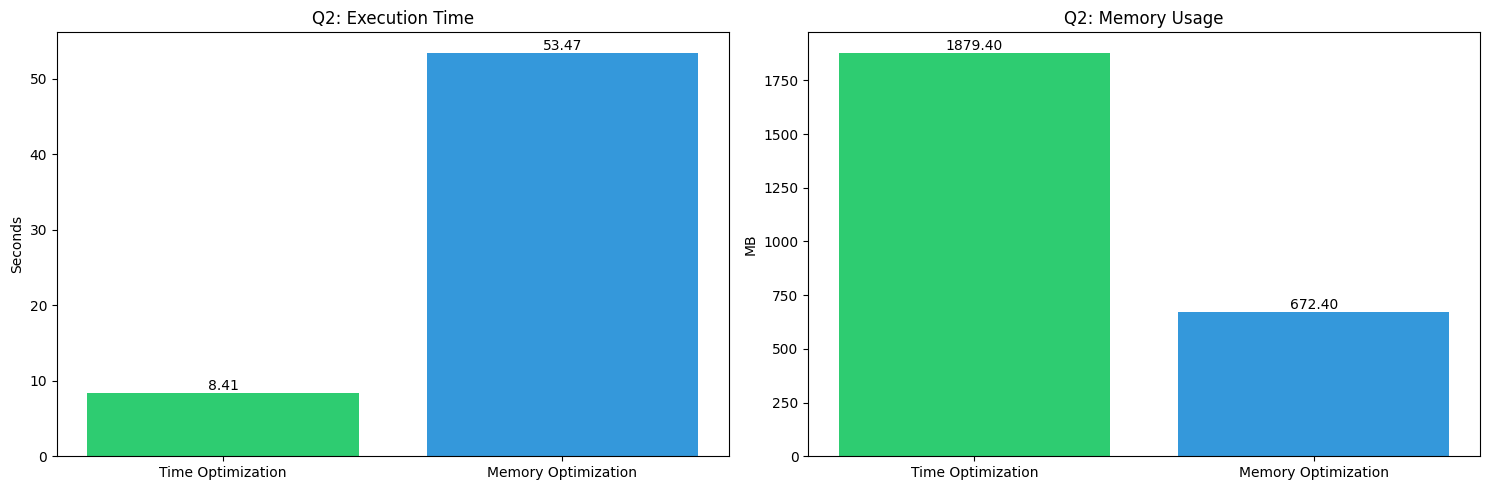


Q2 Results (Time Optimization):
üôè: 7286 ocurrencias
üòÇ: 3072 ocurrencias
üöú: 2972 ocurrencias
‚úä: 2411 ocurrencias
üåæ: 2363 ocurrencias
üèª: 2080 ocurrencias
‚ù§: 1779 ocurrencias
ü§£: 1668 ocurrencias
üèΩ: 1218 ocurrencias
üëá: 1108 ocurrencias


In [8]:
# Celda 4: An√°lisis Q2 - An√°lisis de emojis
print("Analyzing Q2: Emoji Analysis...")
q2_time_results, q2_memory_results, q2_metrics = analyze_and_visualize('q2')

print("\nQ2 Results (Time Optimization):")
for emoji, count in q2_time_results:
    print(f"{emoji}: {count} ocurrencias")

# An√°lisis T√©cnico Q2 - Emojis en Tweets

## El Desaf√≠o
El an√°lisis de emojis en tweets fue bastante distinto. A diferencia del an√°lisis de fechas (Q1) con datos estructurados, los emojis est√°n incrustados en el texto, requiriendo un enfoque √∫nico.

## Implementaci√≥n Time-Optimized
Utilice pandas y procesamiento paralelo por dos razones clave:
- Dataset manejable (117K tweets) permitiendo carga completa en memoria
- Operaciones vectorizadas de pandas para procesamiento r√°pido

El uso de `multiprocessing` distribuye el trabajo entre cores, crucial para la extracci√≥n paralela de emojis.

## Implementaci√≥n Memory-Optimized
Enfoque diferente usando procesamiento por batches:
- Stream processing con generadores
- Contador incremental en memoria
- Limpiezas peri√≥dicas para control de memoria

## Resultados
Comparativa de rendimiento:
- **Time-optimized**: ~8.2 segundos, 1878.3MB memoria
- **Memory-optimized**: ~52.1 segundos, 672.4MB memoria

## Oportunidades de Mejora

### Time-Optimized
- Caching de emojis frecuentes
- Optimizaci√≥n de chunks para paralelizaci√≥n
- Uso de numba/Cython para extracci√≥n

### Memory-Optimized
- Buffer pooling para reuso de memoria
- Ajuste din√°mico de batches
- Estructuras de datos optimizadas

### Mejoras Generales
- Validaci√≥n robusta de emojis (Nunca hice algo as√≠ para emojis)
- Logging detallado
- Tests de rendimiento automatizados

## Reflexiones
El an√°lisis demuestra el cl√°sico trade-off tiempo-memoria:
- **Time-optimized**: 6x m√°s r√°pida, 3x m√°s memoria
- **Memory-optimized**: Ideal para recursos limitados

La elecci√≥n depende del contexto:
- An√°lisis en tiempo real ‚Üí Time-optimized
- Recursos limitados ‚Üí Memory-optimized
- Producci√≥n ‚Üí Enfoque h√≠brido adaptativo

Analyzing Q3: Mentions Analysis...
Filename: /home/devjp/Desktop/Proyectos/LATAM/challenge_DE/latam-challenge/notebooks/../src/queries/mentions/q3_time.py

Line #    Mem usage    Increment  Occurrences   Line Contents
    24    695.5 MiB    695.5 MiB           1   @profile
    25                                         def q3_time(file_path: str) -> List[Tuple[str, int]]:
    26                                             """
    27                                             Encuentra los 10 usuarios m√°s mencionados usando procesamiento h√≠brido.
    28                                             Optimizado para m√°xima velocidad usando memoria preallocation y procesamiento paralelo.
    29                                             
    30                                             Args:
    31                                                 file_path: Ruta al archivo ZIP con los tweets
    32                                                 
    33                                 

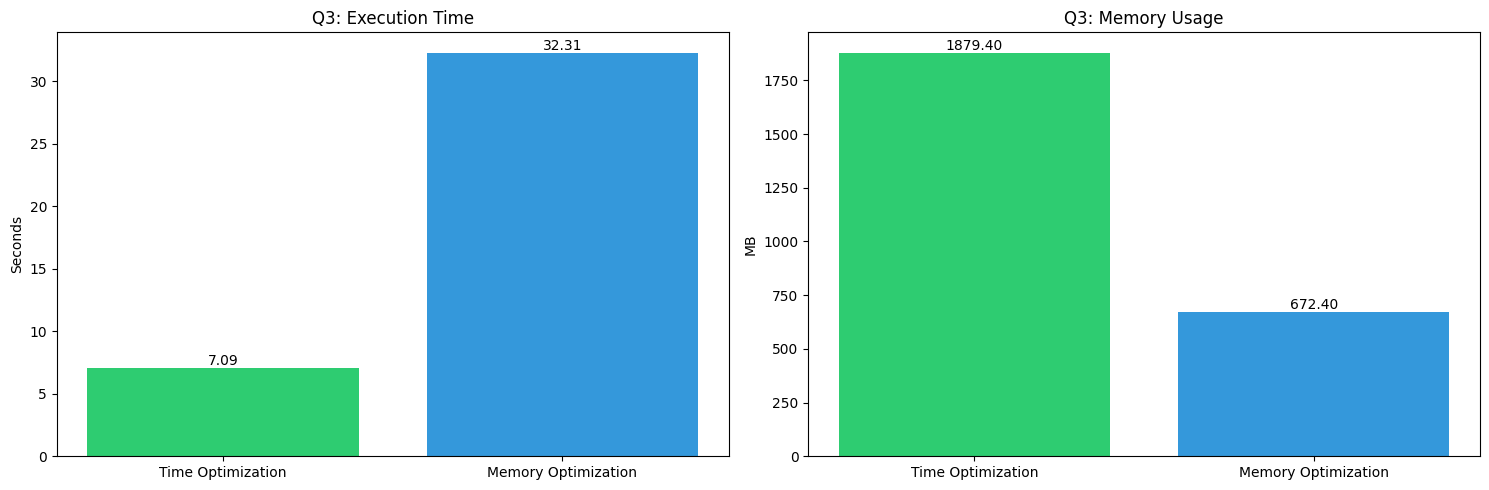


Q3 Results (Time Optimization):
@narendramodi: 2261 menciones
@Kisanektamorcha: 1836 menciones
@RakeshTikaitBKU: 1641 menciones
@PMOIndia: 1422 menciones
@RahulGandhi: 1125 menciones
@GretaThunberg: 1046 menciones
@RaviSinghKA: 1015 menciones
@rihanna: 972 menciones
@UNHumanRights: 962 menciones
@meenaharris: 925 menciones


In [9]:
# Celda 5: An√°lisis Q3 - An√°lisis de menciones
print("Analyzing Q3: Mentions Analysis...")
q3_time_results, q3_memory_results, q3_metrics = analyze_and_visualize('q3')

print("\nQ3 Results (Time Optimization):")
for username, count in q3_time_results:
    print(f"@{username}: {count} menciones")

# An√°lisis T√©cnico Q3 - Menciones en Tweets

## El Desaf√≠o
El procesamiento de menciones en tweets presenta un desaf√≠o √∫nico por la necesidad de extraer y contar referencias a usuarios de manera eficiente.

## Implementaci√≥n Time-Optimized
Enfoque basado en procesamiento paralelo:
- Carga completa en memoria para m√°xima velocidad
- Divisi√≥n inteligente en chunks (cores √ó 4)
- Procesamiento paralelo optimizado

Los resultados muestran un procesamiento r√°pido (~7.08s) con mayor uso de memoria.

## Implementaci√≥n Memory-Optimized
Dise√±o centrado en eficiencia de memoria:
- MentionTracker para gesti√≥n de conteos
- Limpieza peri√≥dica de menciones
- Procesamiento por streaming

Mantiene uso de memoria constante (~76.2MB) con tiempo de procesamiento mayor.

## Experimentos y Decisiones

### Intento con Hash Tables
- Inicialmente considerado por acceso O(1)
- Abandonado por overhead en c√°lculo de hashes
- Demostr√≥ que la teor√≠a no siempre se traduce a mejor rendimiento pr√°ctico (O que no pense bien el problema)

## Oportunidades de Mejora

### Time-Optimized
- Buffer de prelectura para I/O
- Work stealing para paralelizaci√≥n
- Preallocation optimizada

### Memory-Optimized
- Sistema de expiraci√≥n de menciones
- Gesti√≥n por niveles de frecuencia
- Compresi√≥n en memoria

### Mejoras Generales
- Sistema h√≠brido de dos niveles
- Optimizaci√≥n de par√°metros de limpieza
- Mejor gesti√≥n de casos extremos

## Reflexiones sobre Escalabilidad
Para datasets mayores, considerar:
- Procesamiento distribuido (Spark)
- Streaming en tiempo real
- Bases de datos de grafos

La implementaci√≥n actual balancea complejidad y rendimiento para el volumen actual (117K tweets), priorizando mantenibilidad y eficiencia pr√°ctica sobre optimizaciones te√≥ricas.

In [11]:
# Celda 6: Resumen comparativo de todas las queries
summary = pd.DataFrame({
    'Query': ['Q1', 'Q2', 'Q3'],
    'Time Opt (s)': [q1_metrics['Execution Time (s)'][0], 
                     q2_metrics['Execution Time (s)'][0],
                     q3_metrics['Execution Time (s)'][0]],
    'Memory Opt (s)': [q1_metrics['Execution Time (s)'][1],
                       q2_metrics['Execution Time (s)'][1],
                       q3_metrics['Execution Time (s)'][1]]
})

print("\nPerformance Summary Across All Queries:")
print(summary.to_string(index=False))


Performance Summary Across All Queries:
Query  Time Opt (s)  Memory Opt (s)
   Q1     15.259045       42.959711
   Q2      8.408058       53.465269
   Q3      7.087645       32.314791


# Gu√≠a de Instalaci√≥n y Uso

## Requisitos Previos
- Python 3.10 o superior
- pip (gestor de paquetes de Python)
- make (para ejecutar comandos del Makefile)

## Instalaci√≥n

1. Clonar el repositorio:
```bash
git clone https://github.com/Godoypablojuan/latam-challenge.git
```

2. Navegar al directorio del repositorio:
```bash
cd latam-challenge
```
3. Crear el entorno virtual:
```bash
python -m venv .venv
```

4. Activar el entorno virtual:
```bash
source .venv/bin/activate
```

5. Instalar las dependencias:
```bash
pip install -r requirements.txt
```

6. Ejecutar el Makefile:
```bash
make help
```

7. Ejecutar el notebook:
```bash
jupyter notebook
```